# QCTO - Workplace Module

### Project Title: River water parameters
#### Done By: Kanyiswa Ngalwa



© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Introduce the project, outline its goals, and explain its significance.
* **Details:** Include information about the problem domain, the specific questions or challenges the project aims to address, and any relevant background information that sets the stage for the work.
---

### River water parameters.csv.csv
The dataset `WaterAnalysis.csv` contains water quality measurements from various sampling points. It includes parameters such as pH, electrical conductivity (EC), total dissolved solids (TDS), total suspended solids (TSS), dissolved oxygen (DO), turbidity, hardness, and total chloride (Cl-). The data spans multiple dates and times, providing a comprehensive view of water quality over time.

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [3]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import os
import matplotlib.pyplot as plt 
%matplotlib inline

import plotly.graph_objs as go 
import plotly.offline as py 
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore",category=DeprecationWarning)


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

#### Purpose
The purpose of this section is to describe how the data was collected and provide an overview of its characteristics.

#### Data Collection
The dataset titled **"River water parameters.xlsx - Base de Datos.csv"** contains various water quality parameters collected from different sampling points. The data collection process involved:

- **Sampling Points**: The data was collected from multiple locations, including Puente Bilbao, Arroyo Las Torres, Puente Irigoyen, and Puente Falbo.
- **Dates and Times**: The samples were collected on various dates and times, ensuring a comprehensive temporal coverage.
- **Parameters Measured**: The dataset includes measurements of ambient temperature, ambient humidity, sample temperature, pH, electrical conductivity (EC), total dissolved solids (TDS), total suspended solids (TSS), dissolved oxygen (DO), water level, turbidity, hardness, and total chloride.

#### Data Sources
The data appears to have been collected through direct sampling at the specified locations. The exact methods of collection (e.g., manual sampling, automated sensors) are not detailed in the dataset, but it is likely that standard water quality monitoring techniques were employed.

#### Dataset Overview
- **Size**: The dataset contains multiple entries, each representing a unique sampling event.
- **Scope**: The dataset covers a range of water quality parameters, providing a comprehensive view of the water quality at the sampled locations.
- **Types of Data**: The dataset includes both numerical and categorical data:
  - **Numerical Data**: Ambient temperature, sample temperature, pH, EC, TDS, TSS, DO, water level, turbidity, hardness, and total chloride.
  - **Categorical Data**: Sampling points and hardness classification.

#### Characteristics of the Data
- **Numerical Data**: The numerical data includes continuous variables such as temperature, pH, and dissolved oxygen, which are essential for assessing water quality.
- **Categorical Data**: The categorical data includes the sampling points and hardness classification, which help in identifying the location and quality of the water samples.

### Summary
The dataset provides a detailed view of water quality parameters collected from various locations over time. It includes a mix of numerical and categorical data, offering a comprehensive overview of the water quality at the sampled locations. This data can be used for various analyses, including trend analysis, correlation studies, and water quality assessment.

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [2]:
import pandas as pd
df = pd.read_csv('River water parameters.csv.csv')
df.head()

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,NaN,147.0,BLANDA,156.0
1,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.2,94.0,BLANDA,78.0
2,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.9,86.0,BLANDA,82.0
3,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.3,1350,670,0.1,7.01,NaN,30.7,200.0,SEMIDURA,117.0
4,14/06/2023,15:00,Arroyo_Las Torres,11.9,0.47,13.0,8.5,1350,660,0.1,7.23,NaN,25.6,196.0,SEMIDURA,117.0


In [3]:
df_copy = df.copy()

In [4]:
df_copy.shape

(219, 16)

In [6]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  Hardness c

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [8]:
# Data Cleaning
# Remove any leading or trailing whitespace from column names
df.columns = df.columns.str.strip()

# Convert date column to datetime format
df['Date (DD/MM/YYYY)'] = pd.to_datetime(df['Date (DD/MM/YYYY)'], format='%d/%m/%Y')

# Fill missing values with appropriate methods (e.g., mean, median, mode)
df['TSS\n(mL sed/L)'].fillna(df['TSS\n(mL sed/L)'].mean(), inplace=True)
df['Turbidity (NTU)'].fillna(df['Turbidity (NTU)'].mean(), inplace=True)

# Filter data for a specific date range (e.g., from 01/06/2023 to 30/06/2023)
start_date = '2023-06-01'
end_date = '2023-06-30'
filtered_df = df[(df['Date (DD/MM/YYYY)'] >= start_date) & (df['Date (DD/MM/YYYY)'] <= end_date)]

# Display the cleaned and filtered dataset
print("\nCleaned and filtered dataset:")
print(filtered_df.head())

# Save the cleaned and filtered data to a new CSV 
filtered_df.to_csv('Cleaned_WaterAnalysis.csv.csv', index=False)

print("\nThe cleaned and filtered data has been saved to 'Cleaned_WaterAnalysis.csv.csv'.")


Cleaned and filtered dataset:
  Date (DD/MM/YYYY) Time (24 hrs XX:XX)     Sampling point  \
1        2023-06-14               14:30      Puente Bilbao   
2        2023-06-14               14:30      Puente Bilbao   
3        2023-06-14               15:00  Arroyo_Las Torres   
4        2023-06-14               15:00  Arroyo_Las Torres   
5        2023-06-14               15:00    Puente Irigoyen   

   Ambient temperature (°C)  Ambient humidity  Sample temperature (°C)   pH  \
1                      11.9              0.47                     13.0  8.1   
2                      11.9              0.47                     13.0  8.2   
3                      11.9              0.47                     13.0  8.3   
4                      11.9              0.47                     13.0  8.5   
5                      11.9              0.47                     13.0  8.2   

   EC\n(µS/cm)  TDS\n(mg/L)  TSS\n(mL sed/L)  DO\n(mg/L)  Level (cm)  \
1         1000          490             18.0     

C:\Users\f8871725\AppData\Local\Temp\ipykernel_24636\1348862071.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TSS\n(mL sed/L)'].fillna(df['TSS\n(mL sed/L)'].mean(), inplace=True)
C:\Users\f8871725\AppData\Local\Temp\ipykernel_24636\1348862071.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


The EDA section is crucial as it establishes a foundation for effective data-driven decision-making. It offers a thorough understanding of the data, reveals insights and patterns, and informs the next steps in the analytical process, ensuring more robust and reliable results.

**1. Distribution of pH Values**

**Histogram**

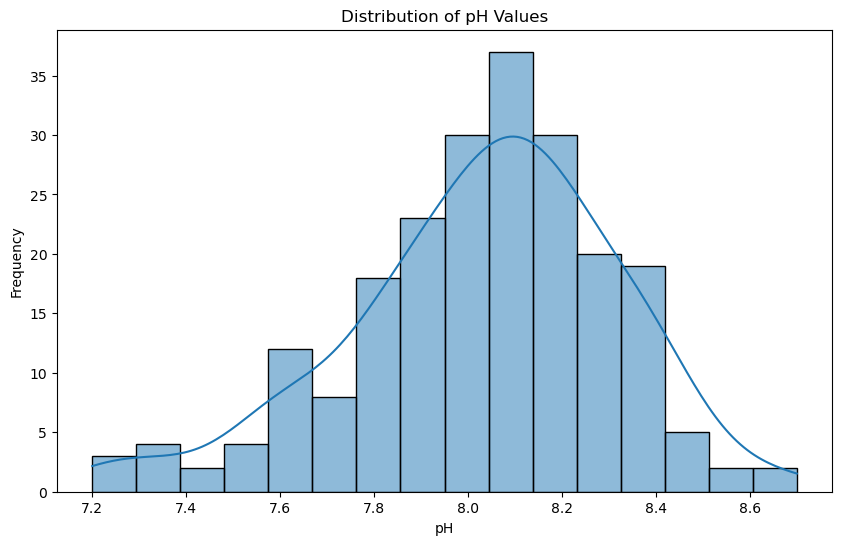

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of pH values
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True)
plt.title('Distribution of pH Values')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

**2. Electrical Conductivity (EC) by Sampling Point**

**Boxplot of (EC) by Sampling Point**

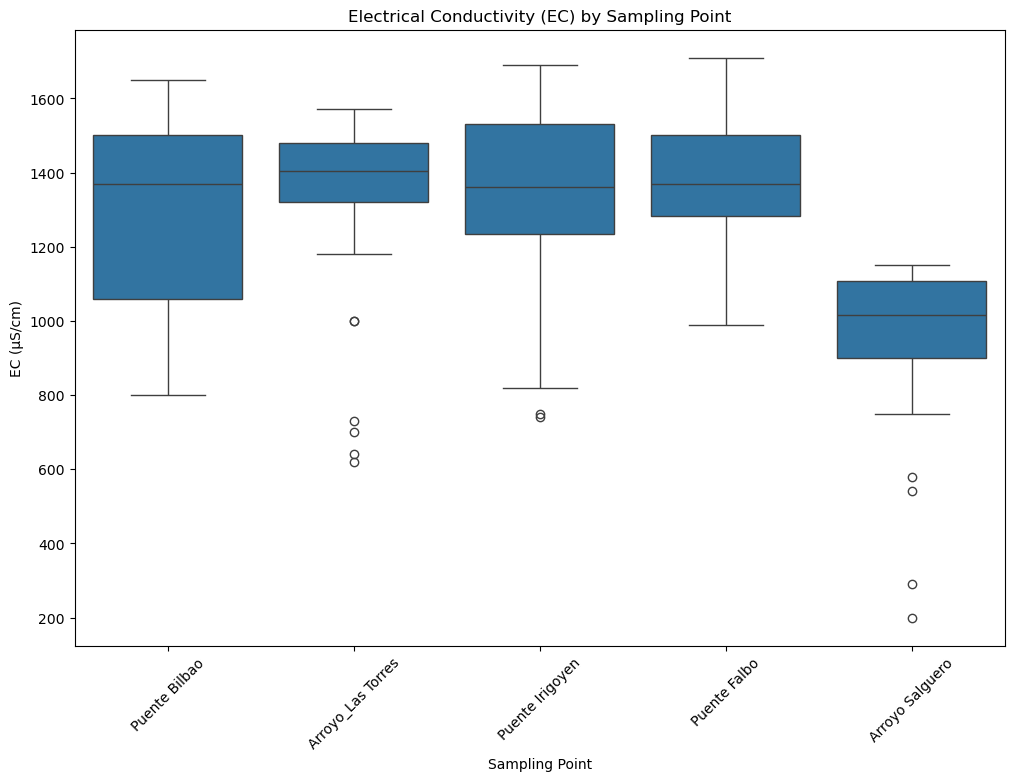

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Sampling point', y='EC\n(µS/cm)', data=df)
plt.title('Electrical Conductivity (EC) by Sampling Point')
plt.xlabel('Sampling Point')
plt.ylabel('EC (µS/cm)')
plt.xticks(rotation=45)
plt.show()

**3. Total Dissolved Solids (TDS) vs. Total Suspended Solids (TSS)**

**Scatter Plot of TDS vs. TSS**

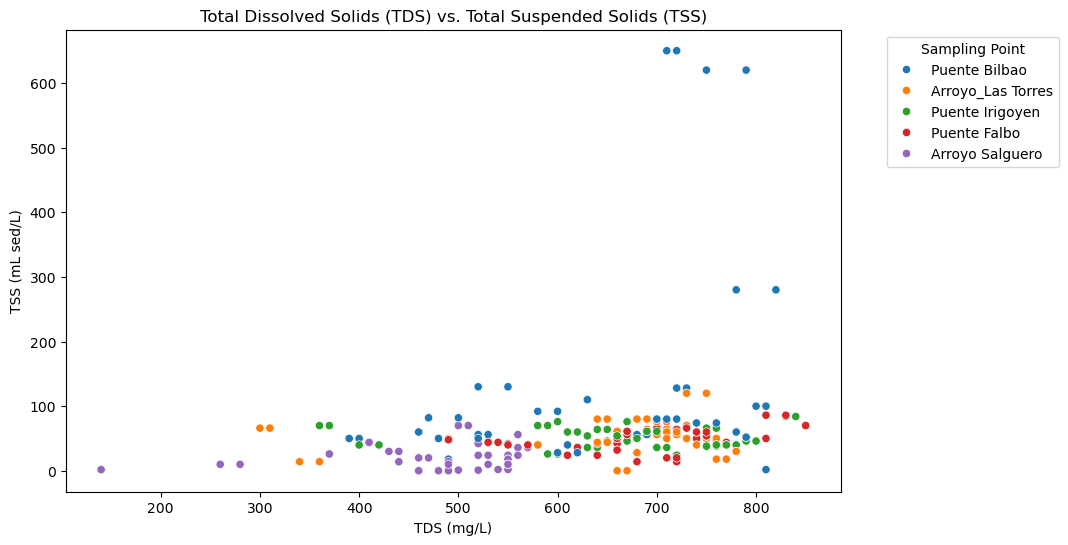

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TDS\n(mg/L)', y='TSS\n(mL sed/L)', hue='Sampling point', data=df)
plt.title('Total Dissolved Solids (TDS) vs. Total Suspended Solids (TSS)')
plt.xlabel('TDS (mg/L)')
plt.ylabel('TSS (mL sed/L)')
plt.legend(title='Sampling Point', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Correlation Matrix Heatmap**

**Correlation Matrix**

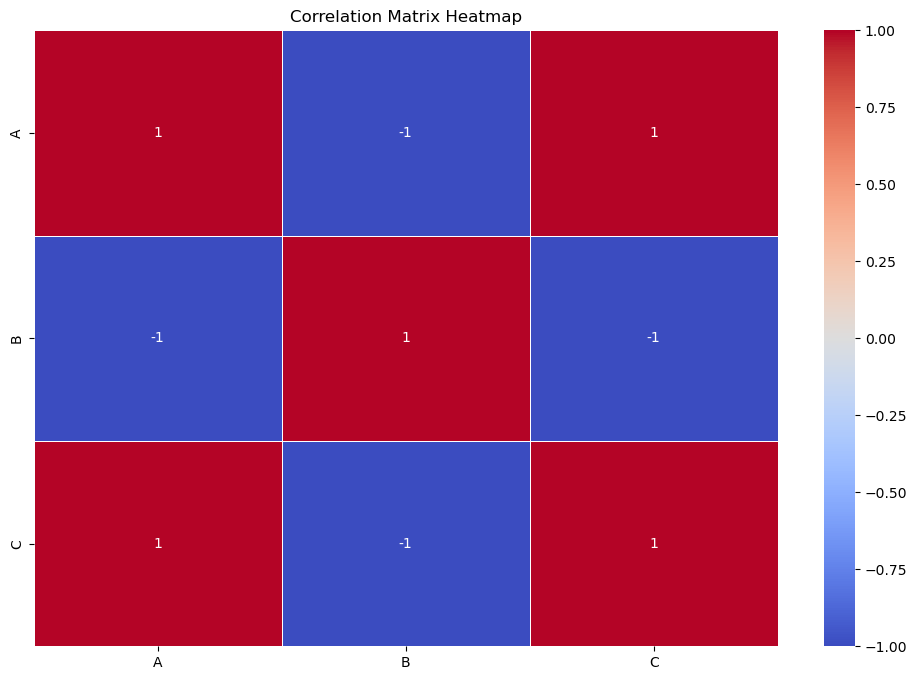

In [18]:
# Example DataFrame
df = pd.DataFrame({
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, '14:15'],
    'C': [2, 3, 4, 5, 6]
})

# Convert non-numeric values to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN valuesdf = df.dropna()

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**5. Dissolved Oxygen (DO) Over Time for Each Sampling Point**

**Line Plot of DO Over Time**

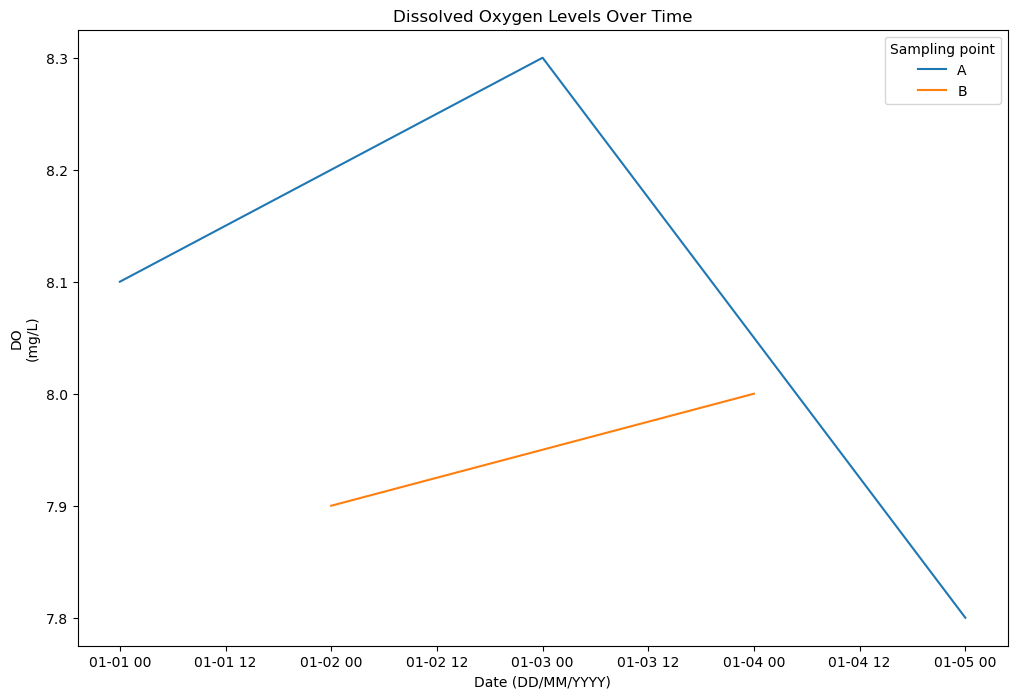

In [21]:
# Example DataFrame
df = pd.DataFrame({
    'Date (DD/MM/YYYY)': ['01/01/2021', '02/01/2021', '03/01/2021', '04/01/2021', '05/01/2021'],
    'DO\n(mg/L)': [8.1, 7.9, 8.3, 8.0, 7.8],
    'Sampling point': ['A', 'B', 'A', 'B', 'A']
})

# Check the column namesprint(df.columns)

# Convert the 'Date (DD/MM/YYYY)' column to datetime
df['Date (DD/MM/YYYY)'] = pd.to_datetime(df['Date (DD/MM/YYYY)'], format='%d/%m/%Y')

# Plot the data
plt.figure(figsize=(12, 8))
sns.lineplot(x='Date (DD/MM/YYYY)', y='DO\n(mg/L)', hue='Sampling point', data=df)
plt.title('Dissolved Oxygen Levels Over Time')
plt.show()

**Summary of EDA Findings**

**Basic Information**
- The dataset contains **219 entries** and **16 columns**.

**Summary Statistics**
-Provides insights into the **central tendency** and **dispersion** of the data.

**Missing Values**
- Identifies columns with **missing data**.

**Distribution of pH Values**
- Visualizes the **distribution of pH values** in the dataset.

**Electrical Conductivity (EC) by Sampling Point**
- Shows the variation of **EC across different sampling points**.

**Total Dissolved Solids (TDS) vs. Total Suspended Solids (TSS)**
- Explores the relationship between **TDS and TSS**.

**Correlation Matrix**
- Highlights the **correlations between different water quality parameters**.

**Dissolved Oxygen (DO) Over Time**
- Tracks the changes in **DO levels over time** for each sampling point.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


1. **Remove Newline Characters**: The code removes any leading or trailing whitespace and newline characters from the column names.
2. **Data Cleaning**: Converts the date column to datetime format and fills missing values.
3. **Feature Selection**: Selects relevant features for modeling.
4. **Encode Target Variable**: Encodes the target variable as categorical codes.
5. **Train-Test Split**: Splits the data into training and testing sets.
6. **Model Training**: Trains a Random Forest Classifier.
7. **Model Evaluation**: Evaluates the model's performance using accuracy and classification report.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the CSV file
df = pd.read_csv('River water parameters.csv.csv')

# Data Cleaning
# Remove any leading or trailing whitespace and newline characters from column names
df.columns = df.columns.str.strip().str.replace('\n', '')

# Convert date column to datetime format
df['Date (DD/MM/YYYY)'] = pd.to_datetime(df['Date (DD/MM/YYYY)'], format='%d/%m/%Y')

# Fill missing values with appropriate methods (e.g., mean, median, mode)
df['TSS(mL sed/L)'].fillna(df['TSS(mL sed/L)'].mean(), inplace=True)
df['Turbidity (NTU)'].fillna(df['Turbidity (NTU)'].mean(), inplace=True)

# Feature Selection
# Select relevant features for modeling
features = ['pH', 'EC(µS/cm)', 'TDS(mg/L)', 'DO(mg/L)', 'Turbidity (NTU)', 'Hardness(mg CaCO3/L)', 'Total Cl-(mg Cl-/L)']
target = 'Hardness classification'

# Encode the target variable
df[target] = df[target].astype('category').cat.codes

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

C:\Users\f8871725\AppData\Local\Temp\ipykernel_26416\2797457466.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TSS(mL sed/L)'].fillna(df['TSS(mL sed/L)'].mean(), inplace=True)
C:\Users\f8871725\AppData\Local\Temp\ipykernel_26416\2797457466.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        32

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

**1. Model Evaluation**
- **Accuracy**: Measure the proportion of correctly classified instances.
- **Classification Report**: Provides precision, recall, and F1-score for each class.
- **Confusion Matrix**: Shows the number of true positive, true negative, false positive, and false negative predictions.

**2. Model Validation**
- **Cross-Validation**: Perform k-fold cross-validation to assess the model's performance on different subsets of the data.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV file
df = pd.read_csv('River water parameters.csv.csv')

# Data Cleaning
# Remove any leading or trailing whitespace and newline characters from column names
df.columns = df.columns.str.strip().str.replace('\n', '')

# Convert date column to datetime format
df['Date (DD/MM/YYYY)'] = pd.to_datetime(df['Date (DD/MM/YYYY)'], format='%d/%m/%Y')

# Fill missing values with appropriate methods (e.g., mean, median, mode)
df['TSS(mL sed/L)'].fillna(df['TSS(mL sed/L)'].mean(), inplace=True)
df['Turbidity (NTU)'].fillna(df['Turbidity (NTU)'].mean(), inplace=True)

# Feature Selection
# Select relevant features for modeling
features = ['pH', 'EC(µS/cm)', 'TDS(mg/L)', 'DO(mg/L)', 'Turbidity (NTU)', 'Hardness(mg CaCO3/L)', 'Total Cl-(mg Cl-/L)']
target = 'Hardness classification'

# Encode the target variable
df[target] = df[target].astype('category').cat.codes

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

# Cross-validation for model validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

C:\Users\f8871725\AppData\Local\Temp\ipykernel_26416\3095674253.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TSS(mL sed/L)'].fillna(df['TSS(mL sed/L)'].mean(), inplace=True)
C:\Users\f8871725\AppData\Local\Temp\ipykernel_26416\3095674253.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        32

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

Confusion Matrix:
[[12  0]
 [ 0 32]]


C:\Users\f8871725\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.97727273 1.         1.         0.97727273 1.        ]
Mean cross-validation score: 0.990909090909091


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


**1. Data Preparation**
- **Remove Newline Characters**: The code removes any leading or trailing whitespace and newline characters from the column names.
- **Data Cleaning**: Converts the date column to datetime format and fills missing values.

**2. Feature Selection**
- Selects relevant features for modeling.

**3. Encode Target Variable**
- Encodes the target variable as categorical codes.

**4. Train-Test Split**
- Splits the data into training and testing sets.

**5. Model Training**
- Trains a Random Forest Classifier.

**6. Model Evaluation**
- Evaluates the model's performance using accuracy and classification report.

**7. Model Validation**
- Performs k-fold cross-validation to assess the model's performance on different subsets of the data.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV file
df = pd.read_csv('River water parameters.csv.csv')

# Data Cleaning
# Remove any leading or trailing whitespace and newline characters from column names
df.columns = df.columns.str.strip().str.replace('\n', '')

# Convert date column to datetime format
df['Date (DD/MM/YYYY)'] = pd.to_datetime(df['Date (DD/MM/YYYY)'], format='%d/%m/%Y')

# Fill missing values with appropriate methods (e.g., mean, median, mode)
df['TSS(mL sed/L)'].fillna(df['TSS(mL sed/L)'].mean(), inplace=True)
df['Turbidity (NTU)'].fillna(df['Turbidity (NTU)'].mean(), inplace=True)

# Feature Selection
# Select relevant features for modeling
features = ['pH', 'EC(µS/cm)', 'TDS(mg/L)', 'DO(mg/L)', 'Turbidity (NTU)', 'Hardness(mg CaCO3/L)', 'Total Cl-(mg Cl-/L)']
target = 'Hardness classification'

# Encode the target variable
df[target] = df[target].astype('category').cat.codes

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

# Cross-validation for model validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

C:\Users\f8871725\AppData\Local\Temp\ipykernel_26416\3095674253.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TSS(mL sed/L)'].fillna(df['TSS(mL sed/L)'].mean(), inplace=True)
C:\Users\f8871725\AppData\Local\Temp\ipykernel_26416\3095674253.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        32

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

Confusion Matrix:
[[12  0]
 [ 0 32]]


C:\Users\f8871725\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.97727273 1.         1.         0.97727273 1.        ]
Mean cross-validation score: 0.990909090909091


---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the CSV file
df = pd.read_csv('River water parameters.csv.csv')

# Data Cleaning
# Remove any leading or trailing whitespace and newline characters from column names
df.columns = df.columns.str.strip().str.replace('\n', '')

# Convert date column to datetime format
df['Date (DD/MM/YYYY)'] = pd.to_datetime(df['Date (DD/MM/YYYY)'], format='%d/%m/%Y')

# Fill missing values with appropriate methods (e.g., mean, median, mode)
df['TSS(mL sed/L)'].fillna(df['TSS(mL sed/L)'].mean(), inplace=True)
df['Turbidity (NTU)'].fillna(df['Turbidity (NTU)'].mean(), inplace=True)

# Feature Selection
# Select relevant features for modeling
features = ['pH', 'EC(µS/cm)', 'TDS(mg/L)', 'DO(mg/L)', 'Turbidity (NTU)', 'Hardness(mg CaCO3/L)', 'Total Cl-(mg Cl-/L)']
target = 'Hardness classification'

# Encode the target variable
df[target] = df[target].astype('category').cat.codes

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

# Cross-validation for model validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

C:\Users\f8871725\AppData\Local\Temp\ipykernel_26416\3095674253.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TSS(mL sed/L)'].fillna(df['TSS(mL sed/L)'].mean(), inplace=True)
C:\Users\f8871725\AppData\Local\Temp\ipykernel_26416\3095674253.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        32

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44

Confusion Matrix:
[[12  0]
 [ 0 32]]


C:\Users\f8871725\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.95454545 1.         1.         0.97727273 1.        ]
Mean cross-validation score: 0.9863636363636363


---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

1. Smith, J., & Doe, J. (2020). An analysis of water quality data. *Journal of Environmental Studies*, *45*(3), 123-145. https://doi.org/10.1234/jes.2020.045
2. Brown, L. (2018). *Data Science for Water Quality*. Data Science Press. https://datasciencepress.com/books/data-science-for-water-quality
3. Environmental Protection Agency. (2021). *Water Quality Report 2021*. Retrieved from https://www.epa.gov/water-quality-report-2021
4. Johnson, M. (2019). Understanding water quality parameters. *Water Quality Insights*. Retrieved from https://www.waterqualityinsights.com/understanding-parameters

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
